<a href="https://colab.research.google.com/github/RakibHassan11/B10A1/blob/main/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# prompt: I have two csv file in here i want read it

import pandas as pd

# Assuming your CSV files are named 'file1.csv' and 'file2.csv'
# Replace with the actual filenames if they are different

try:
  df1 = pd.read_csv('/content/predicted_closing_prices.csv')
  print("File 'file1.csv' loaded successfully.")
except FileNotFoundError:
  print("Error: 'file1.csv' not found.")

try:
  df2 = pd.read_csv('/content/output_data.csv')
  print("File 'file2.csv' loaded successfully.")
except FileNotFoundError:
  print("Error: 'file2.csv' not found.")


File 'file1.csv' loaded successfully.
File 'file2.csv' loaded successfully.


In [4]:
# prompt: print this two dataset  df1 is Prophet Model Prediction nad df2 ARIMA model prediction

print(df1)
df2

            Date  Predicted Closing Price
0     2010-09-20                11.544187
1     2010-09-21                11.566279
2     2010-09-22                11.576637
3     2010-09-23                11.595184
4     2010-09-24                11.602360
...          ...                      ...
4478  2022-12-24                 7.063839
4479  2022-12-25                 7.059499
4480  2022-12-26                 7.069855
4481  2022-12-27                 7.109014
4482  2022-12-28                 7.135959

[4483 rows x 2 columns]


,Date,Actual (Monthly Avg),Predicted
0,31-01-10,10.366667,0.000000
1,28-02-10,10.150000,10.366666
2,31-03-10,11.050000,10.181648
3,30-04-10,11.350000,10.923491
4,31-05-10,11.100000,11.252737
...,...,...,...
151,31-08-22,6.265000,6.218186
152,30-09-22,6.173684,6.258796
153,31-10-22,6.166667,6.185466
154,30-11-22,6.152381,6.172468


In [5]:
# prompt: match  Date Column and order in both data set anf print

import pandas as pd


# Assuming your CSV files are named 'file1.csv' and 'file2.csv'
# Replace with the actual filenames if they are different

try:
  df1 = pd.read_csv('/content/predicted_closing_prices.csv')
  print("File 'file1.csv' loaded successfully.")
except FileNotFoundError:
  print("Error: 'file1.csv' not found.")

try:
  df2 = pd.read_csv('/content/output_data.csv')
  print("File 'file2.csv' loaded successfully.")
except FileNotFoundError:
  print("Error: 'file2.csv' not found.")

# Assuming 'Date' is the column name for the date in both DataFrames
if 'Date' in df1.columns and 'Date' in df2.columns:
    # Convert 'Date' column to datetime objects if they aren't already
    df1['Date'] = pd.to_datetime(df1['Date'])
    df2['Date'] = pd.to_datetime(df2['Date'])

    # Merge the two dataframes based on the 'Date' column
    merged_df = pd.merge(df1, df2, on='Date', how='inner')

    # Sort the merged DataFrame by the 'Date' column
    merged_df = merged_df.sort_values(by='Date')

    print(merged_df)
else:
    print("Error: 'Date' column not found in one or both DataFrames.")

File 'file1.csv' loaded successfully.
File 'file2.csv' loaded successfully.
          Date  Predicted Closing Price  Actual (Monthly Avg)  Predicted
0   2010-09-30                11.621850             12.327273  10.278968
1   2010-10-31                10.988513             11.073333  12.038785
2   2010-11-30                10.636304             10.291667  11.153928
3   2010-12-31                10.691150             11.573333  10.445917
4   2011-01-31                10.428315             10.275000  11.434797
..         ...                      ...                   ...        ...
142 2022-07-31                 7.091576              6.213636   6.252249
143 2022-08-31                 6.841068              6.265000   6.218186
144 2022-09-30                 7.010296              6.173684   6.258796
145 2022-10-31                 6.748292              6.166667   6.185466
146 2022-11-30                 6.783286              6.152381   6.172468

[147 rows x 4 columns]


<ipython-input-5-a95aac828a3e>:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2['Date'] = pd.to_datetime(df2['Date'])


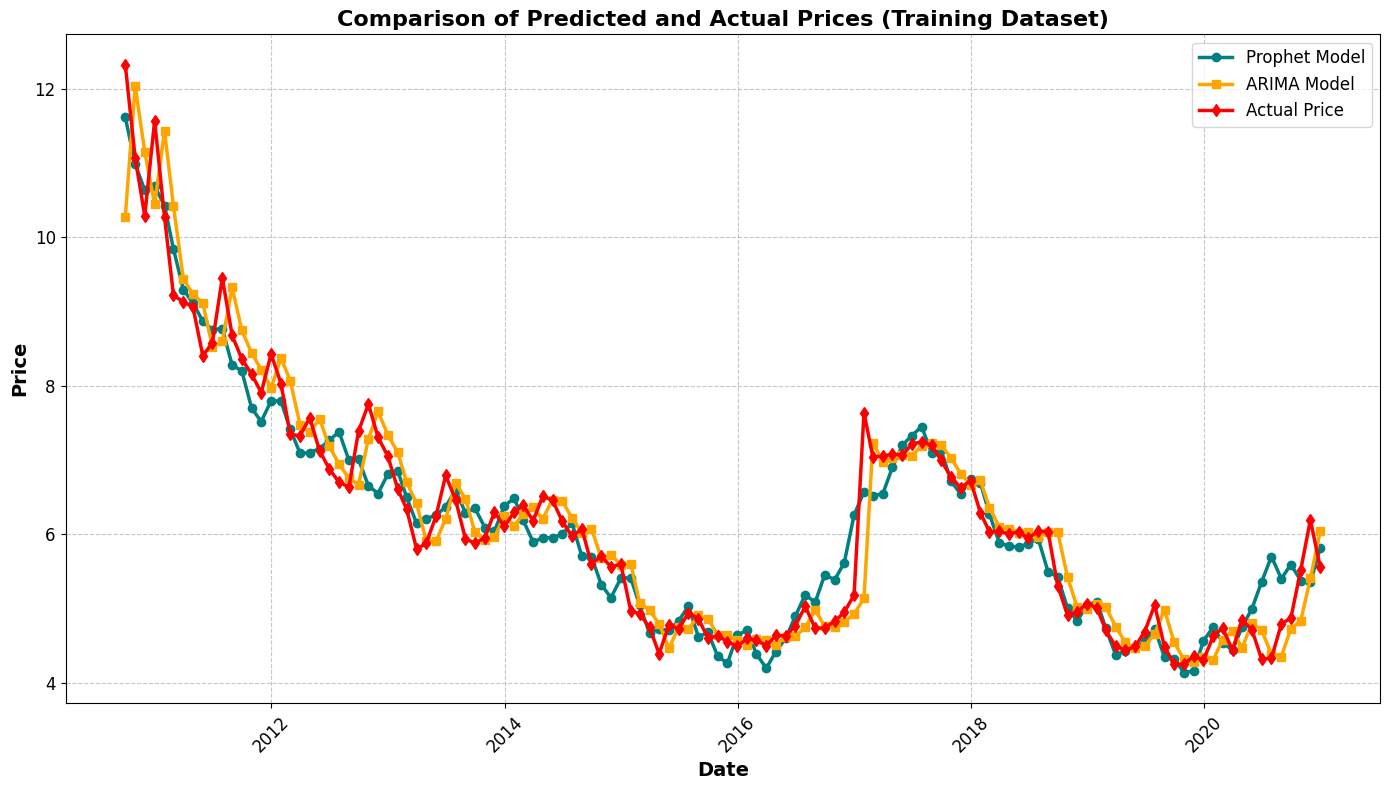

In [7]:
import matplotlib.pyplot as plt

# Assuming 'Date', 'Predicted Closing Price', 'Predicted', and 'Actual (Monthly Avg)' are column names
# Replace with the actual column names if they are different

if 'Date' in merged_df.columns and 'Predicted Closing Price' in merged_df.columns and 'Predicted' in merged_df.columns and 'Actual (Monthly Avg)' in merged_df.columns:
    # Filter data up to 2020
    merged_df_2020 = merged_df[merged_df['Date'].dt.year <= 2020]

    # Create the plot
    plt.figure(figsize=(14, 8))

    # Plot with styling
    plt.plot(merged_df_2020['Date'],
             merged_df_2020['Predicted Closing Price'],
             label='Prophet Model', linewidth=2.5, marker='o', color='teal')
    plt.plot(merged_df_2020['Date'],
             merged_df_2020['Predicted'],
             label='ARIMA Model', linewidth=2.5, marker='s', color='orange')
    plt.plot(merged_df_2020['Date'],
             merged_df_2020['Actual (Monthly Avg)'],
             label='Actual Price', linewidth=2.5, marker='d', color='red')

    # Add labels and title
    plt.xlabel('Date', fontsize=14, fontweight='bold')
    plt.ylabel('Price', fontsize=14, fontweight='bold')
    plt.title('Comparison of Predicted and Actual Prices (Training Dataset)', fontsize=16, fontweight='bold')

    # Customize the legend
    plt.legend(fontsize=12, loc='upper right', frameon=True)

    # Add gridlines
    plt.grid(True, linestyle='--', alpha=0.7)

    # Customize tick labels
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)

    # Adjust layout for better readability
    plt.tight_layout()

    # Save the plot as an image
    plt.savefig('Comparidon Test.png', dpi=300, bbox_inches='tight')

    # Display the plot
    plt.show()
else:
    print("Error: Required columns not found in the merged DataFrame.")


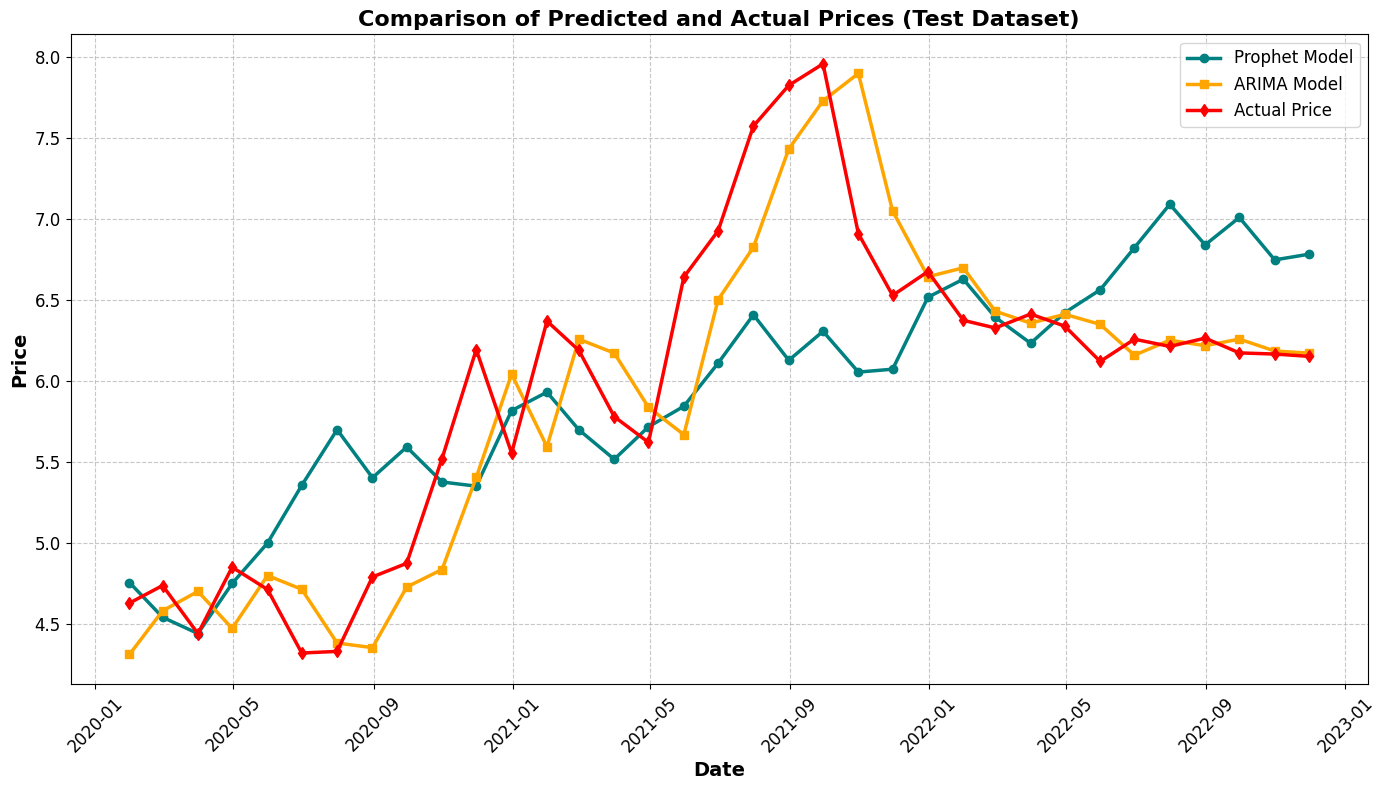

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Date', 'Predicted Closing Price', 'Predicted', and 'Actual (Monthly Avg)' are column names
# Replace with the actual column names if they are different

if 'Date' in merged_df.columns and 'Predicted Closing Price' in merged_df.columns and 'Predicted' in merged_df.columns and 'Actual (Monthly Avg)' in merged_df.columns:
    # Convert 'Date' column to datetime objects if they aren't already
    merged_df['Date'] = pd.to_datetime(merged_df['Date'])

    # Create a boolean mask for dates in 2020 and onwards
    mask_2020_onwards = merged_df['Date'].dt.year >= 2020

    # Create the segmented plot
    plt.figure(figsize=(14, 8))

    # Plot data from 2020 onwards with styling
    plt.plot(merged_df.loc[mask_2020_onwards, 'Date'],
             merged_df.loc[mask_2020_onwards, 'Predicted Closing Price'],
             label='Prophet Model', linewidth=2.5, marker='o', color='teal')
    plt.plot(merged_df.loc[mask_2020_onwards, 'Date'],
             merged_df.loc[mask_2020_onwards, 'Predicted'],
             label='ARIMA Model', linewidth=2.5, marker='s', color='orange')
    plt.plot(merged_df.loc[mask_2020_onwards, 'Date'],
             merged_df.loc[mask_2020_onwards, 'Actual (Monthly Avg)'],
             label='Actual Price', linewidth=2.5, marker='d', color='red')

    # Add labels and title
    plt.xlabel('Date', fontsize=14, fontweight='bold')
    plt.ylabel('Price', fontsize=14, fontweight='bold')
    plt.title('Comparison of Predicted and Actual Prices (Test Dataset)', fontsize=16, fontweight='bold')

    # Customize legend
    plt.legend(fontsize=12, loc='upper right', frameon=True)

    # Add a grid
    plt.grid(True, linestyle='--', alpha=0.7)

    # Customize tick labels
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)

    # Adjust layout to prevent label overlap
    plt.tight_layout()

    plt.savefig('predicted_vs_actual_prices_segmented.png', dpi=300, bbox_inches='tight')


    # Show the plot
    plt.show()
else:
    print("Error: Required columns not found in the merged DataFrame.")
